# Modular adder

## Introduction
This code perfrom modular addition a+b Mod N. Here a and N are classical numbers. 

For example [01] + [01] mod [11] = [10]

For example [01] + [01] mod [01] = [01]

The algorithm is taken from the paper: 	arXiv:quant-ph/0205095

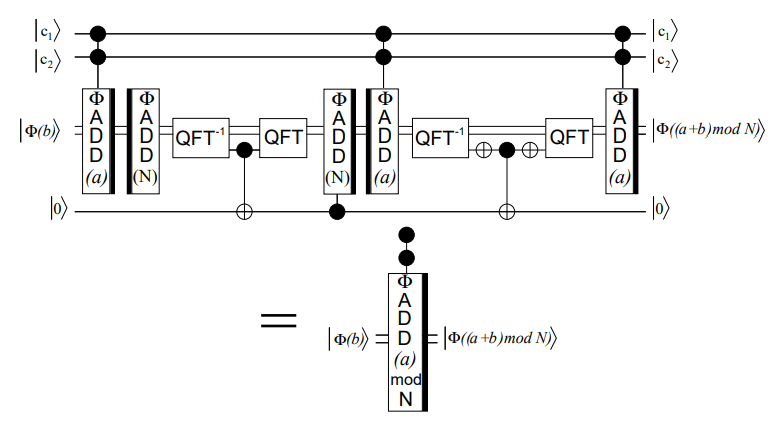

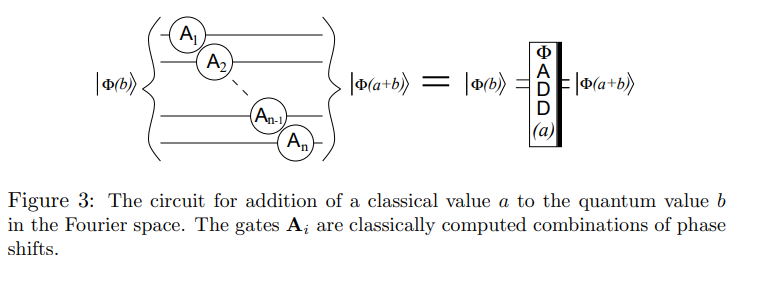

## Content

1) The code for the adder is devloped
2) The same code is realized on the base of a function from my quantum_routines library

## Description
1) The adder adds to numbers with n bits each. One number is quantum, one number is classical.
2) The addition is modulo N. N is also a number with n bits. N is a classical number.



In [1]:
import qiskit
import numpy as np
import quantum_routines as qr

# Modular N adder for bit_size numbers (1 quantum number b and 1 classical number a), controlled by ctrl_bit_size qubits
The results of the adder can be seen in the hystogram below
The hystogram x-axis label show 3 * bit_size numbers. 
Upper bit_size numbers is the classical number a
Middle bit_size numbers is N
The bottom bit_size numbers is the result of the addition

# Important note
While at the beginning you set the bit-size equal to  the size of your numbers, the acual number of bits and qubits in the circuit is 1 digit longer. This digit is needed to track overflow, when two added numbers are bigger that waht can be represented with bit_size bits.

qubit_binary_prepare: Size of quantum number is bigger than that of classical, so the classical number extended by adding few highest bits
qubit_binary_prepare: Size of quantum number is bigger than that of classical, so the classical number extended by adding few highest bits
qubit_binary_prepare: Size of quantum number is bigger than that of classical, so the classical number extended by adding few highest bits


C:\Users\Oleg\AppData\Local\Programs\Python\Python310\lib\site-packages\qiskit\circuit\quantumcircuit.py:3263: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


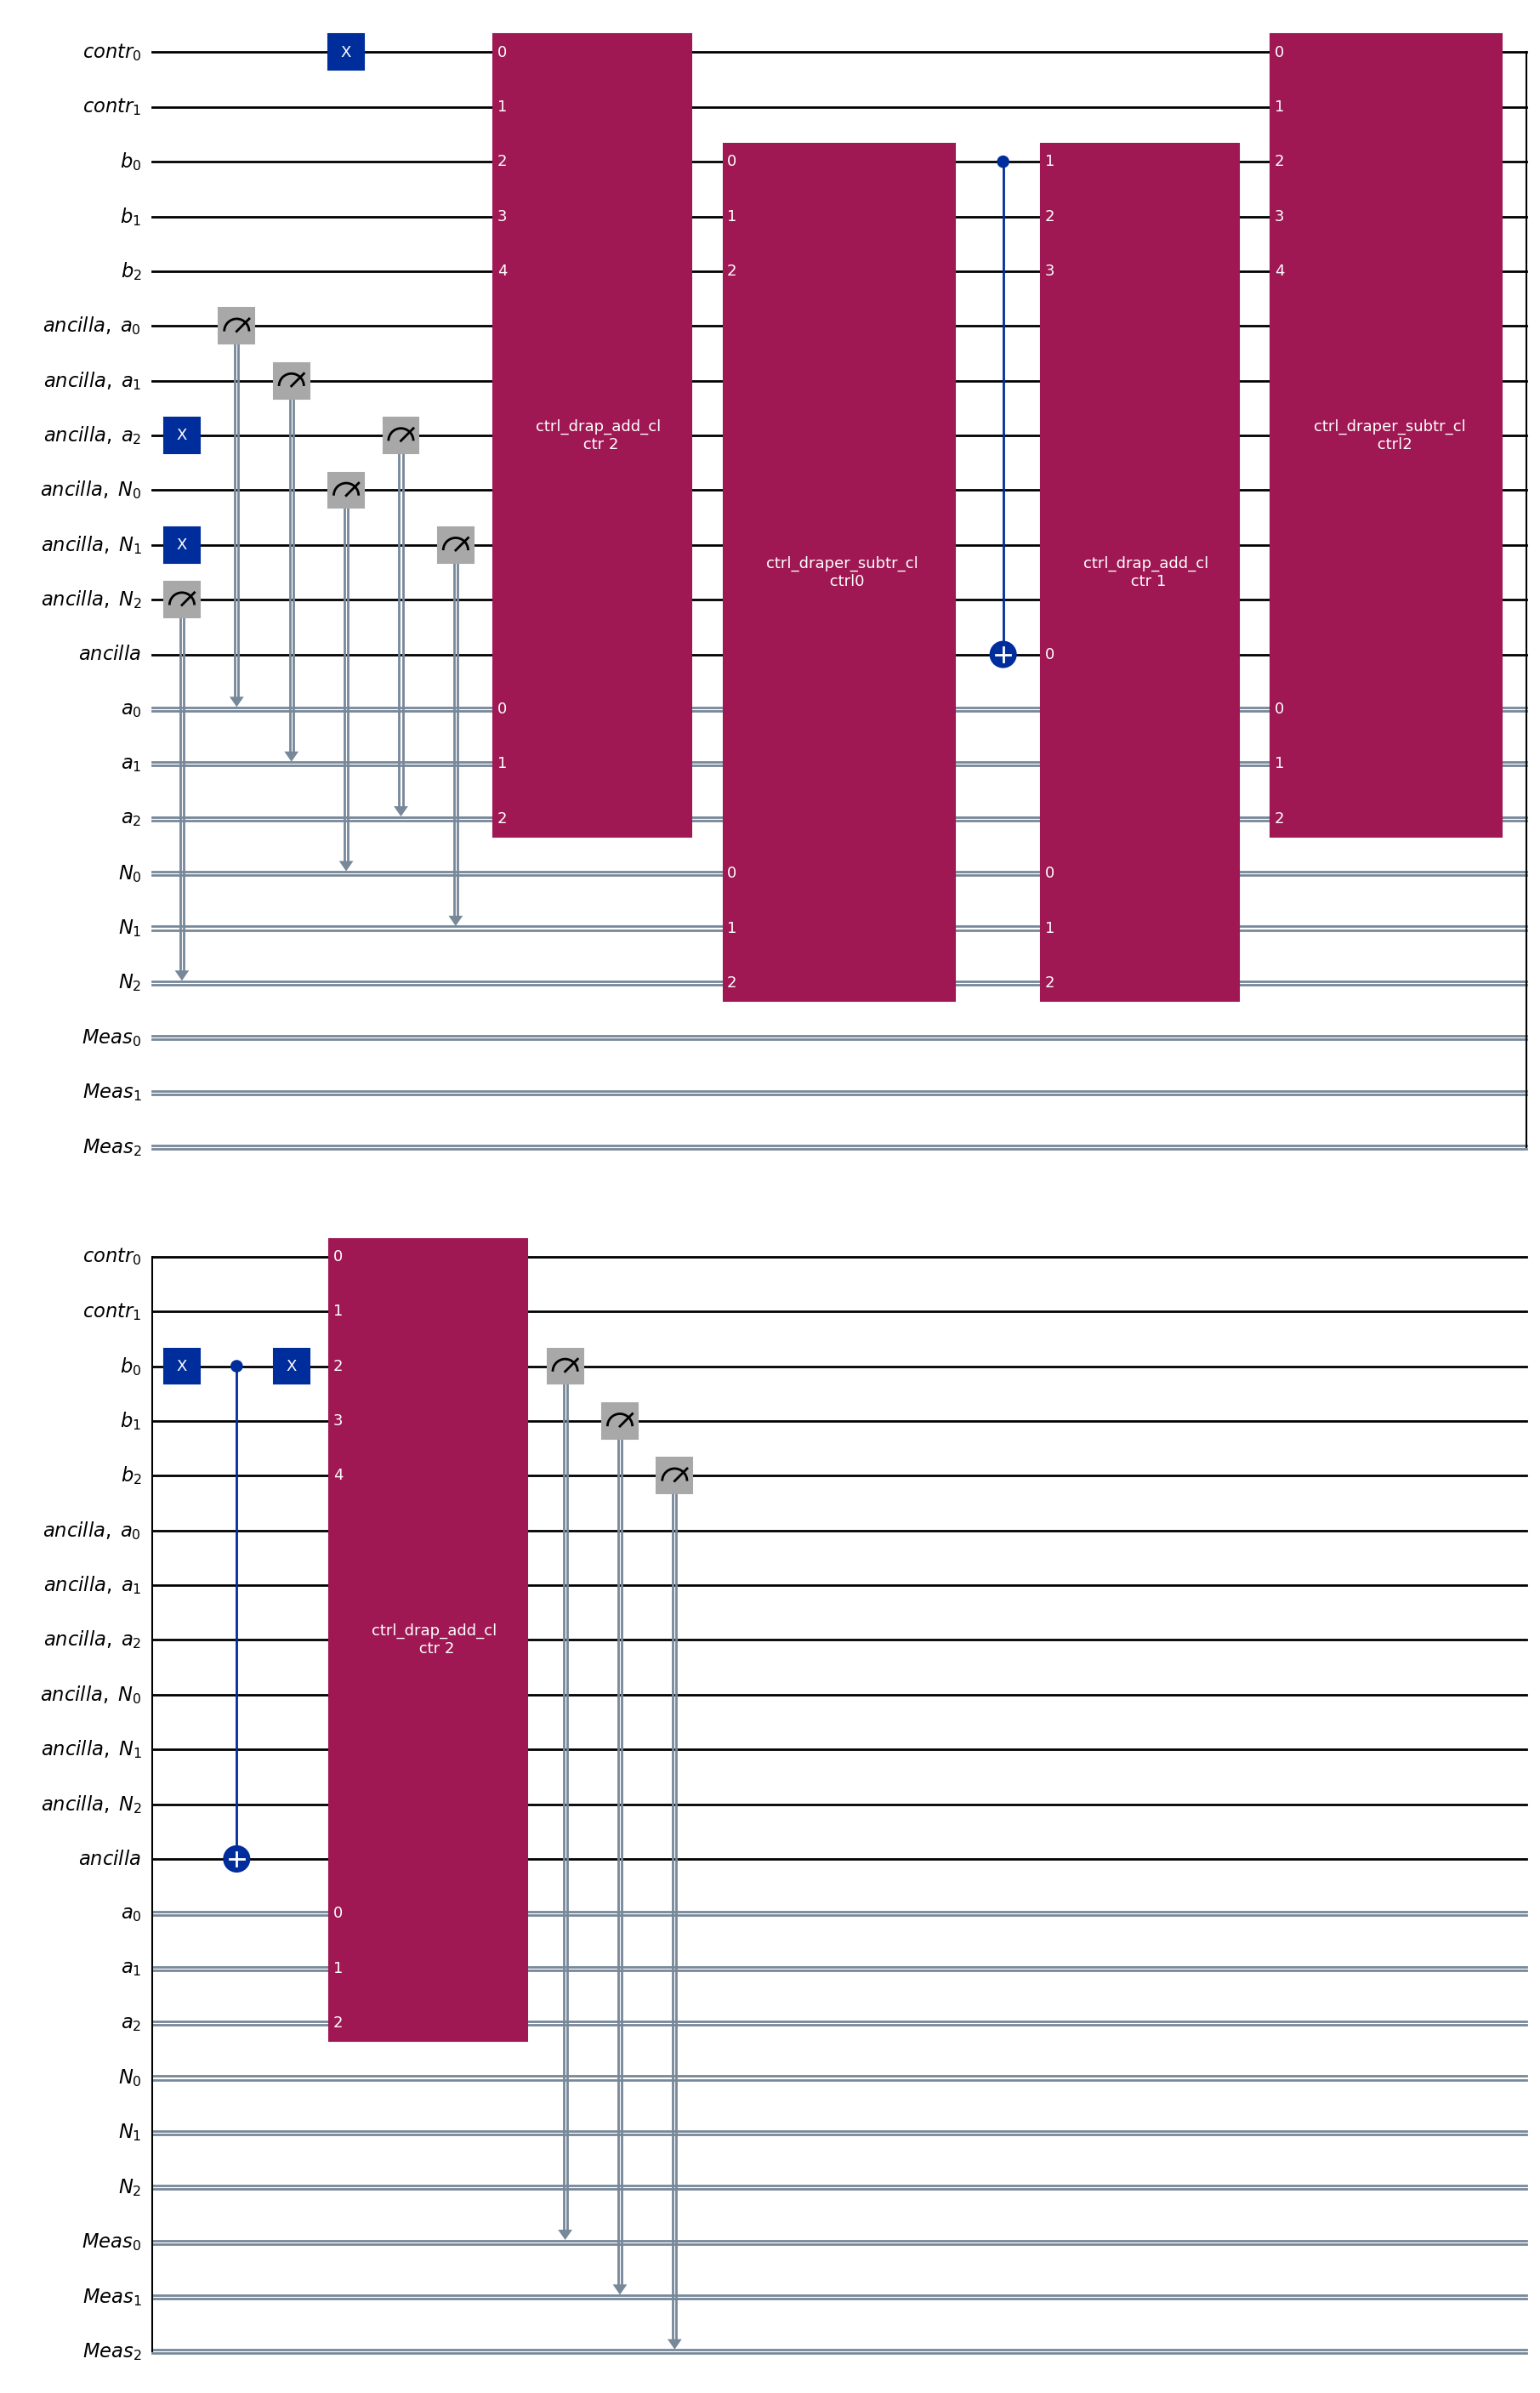

In [2]:
''' the function performs addition of quantum number b to classical number a modulus N (classical number)'''
bit_size = 2
ctrl_bit_size = 2

cl_num_a = [0, 1]
q_num =    [0, 0]
cl_num_N = [1, 0]

cl_control_bits = [1, 0]


bit_size = bit_size + 1
cl_reg_a = qiskit.ClassicalRegister(bit_size, 'a') #classical register to store nclassical number a
cl_reg_N = qiskit.ClassicalRegister(bit_size, 'N') #classical register to store nclassical number N
cl_reg_meas = qiskit.ClassicalRegister(bit_size, 'Meas') #classical register to get measured data

q_reg = qiskit.QuantumRegister(bit_size, 'b') #quantum register to store classical number b
q_reg_cl_a = qiskit.QuantumRegister(bit_size, 'ancilla, a') #ancilla quantum register to store classical number a
q_reg_cl_N = qiskit.QuantumRegister(bit_size, 'ancilla, N') #ancilla quantum register to store classical number N
q_reg_contr = qiskit.QuantumRegister(ctrl_bit_size, 'contr') #ancilla quantum register to store classical control bits
q_anc = qiskit.QuantumRegister(1, 'ancilla') #ancilla quantum qubit

adder_mod_N = qiskit.QuantumCircuit(q_reg_contr, q_reg, q_reg_cl_a, q_reg_cl_N, q_anc, cl_reg_a, cl_reg_N, cl_reg_meas)

#preparing quantum number b
adder_mod_N = qr.qubit_binary_prepare(q_reg, q_num, adder_mod_N)

#preparing classical number a 
adder_mod_N = qr.qubit_binary_prepare(q_reg_cl_a, cl_num_a, adder_mod_N)
adder_mod_N = qr.qubits_meas(q_reg_cl_a, cl_reg_a, adder_mod_N)

#preparing classical number N 
adder_mod_N = qr.qubit_binary_prepare(q_reg_cl_N, cl_num_N, adder_mod_N)
adder_mod_N = qr.qubits_meas(q_reg_cl_N, cl_reg_N, adder_mod_N)

#preparing control qubits
adder_mod_N = qr.qubit_binary_prepare(q_reg_contr, cl_control_bits, adder_mod_N)


inst = qr.draper_adder_cl_instr(bit_size, ctrl_bit_size)
qubits = []
for i in range(0,ctrl_bit_size):
    qubits.append(q_reg_contr[i])
for i in range(bit_size):
    qubits.append(q_reg[i])   
adder_mod_N.append(inst, qubits , cl_reg_a)

inst = qr.draper_subtraction_cl_instr(bit_size, 0)
adder_mod_N.append(inst, q_reg , cl_reg_N)

adder_mod_N.cx(q_reg[0],q_anc)

inst = qr.draper_adder_cl_instr(bit_size, 1)
qubits = [q_anc]
for i in range(bit_size):
    qubits.append(q_reg[i])
adder_mod_N.append(inst, qubits , cl_reg_N)

inst = qr.draper_subtraction_cl_instr(bit_size, ctrl_bit_size)
qubits = []
for i in range(0,ctrl_bit_size):
    qubits.append(q_reg_contr[i])
for i in range(bit_size):
    qubits.append(q_reg[i])   
adder_mod_N.append(inst, qubits , cl_reg_a)

adder_mod_N.x(q_reg[0])
adder_mod_N.cx(q_reg[0],q_anc)
adder_mod_N.x(q_reg[0])


inst = qr.draper_adder_cl_instr(bit_size, ctrl_bit_size)
qubits = []
for i in range(0,ctrl_bit_size):
    qubits.append(q_reg_contr[i])
for i in range(bit_size):
    qubits.append(q_reg[i])   
adder_mod_N.append(inst, qubits , cl_reg_a)


adder_mod_N = qr.qubits_meas(q_reg, cl_reg_meas, adder_mod_N)

adder_mod_N.draw('mpl')


We perfromed addition mod[1, 0] of quantum number [0, 0] and classical number [0, 1].
The result is the lower third of bits in hystogram x-axis notation. The higher the bit is space the hisgher the bit digit.


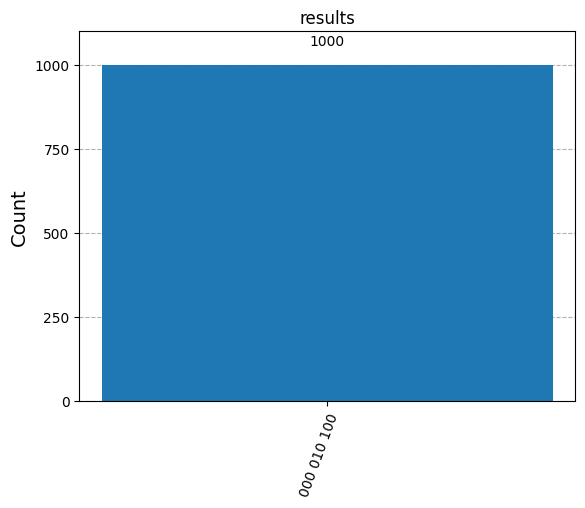

In [22]:
print('We perfromed addition mod' + str(cl_num_N) + ' of quantum number '+str(q_num) + ' and classical number ' + str(cl_num_a) + '.' )
print('The result is the lower third of bits in hystogram x-axis notation. The higher the bit is space the hisgher the bit digit.')
qr.plot_hyst_func(adder_mod_N,1000)

## The same modulo N adder but realized using a function from a quantum_routines library
The added adds two number with bit_size bits.
The adder 
1) The block (adder) has ctrl_bit_size + bit_size + 1 input qubits. The first ctrl_bit_size are control qunbits. The next bit_size qubits is the added number b. The last qubit is a ancilla cubit used in calculations.
2) The block has 2 * bit_size classical inputs. First bit_size is the added number a. The second bit_size bits are for the N number
3) For all numbers the higher the bit in the schemation the higher the bit digit. In other worrds the bit[0] is the highest bit.
    

qubit_binary_prepare: Size of quantum number is bigger than that of classical, so the classical number extended by adding few highest bits
qubit_binary_prepare: Size of quantum number is bigger than that of classical, so the classical number extended by adding few highest bits
qubit_binary_prepare: Size of quantum number is bigger than that of classical, so the classical number extended by adding few highest bits


C:\Users\Oleg\AppData\Local\Programs\Python\Python310\lib\site-packages\qiskit\circuit\quantumcircuit.py:3263: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


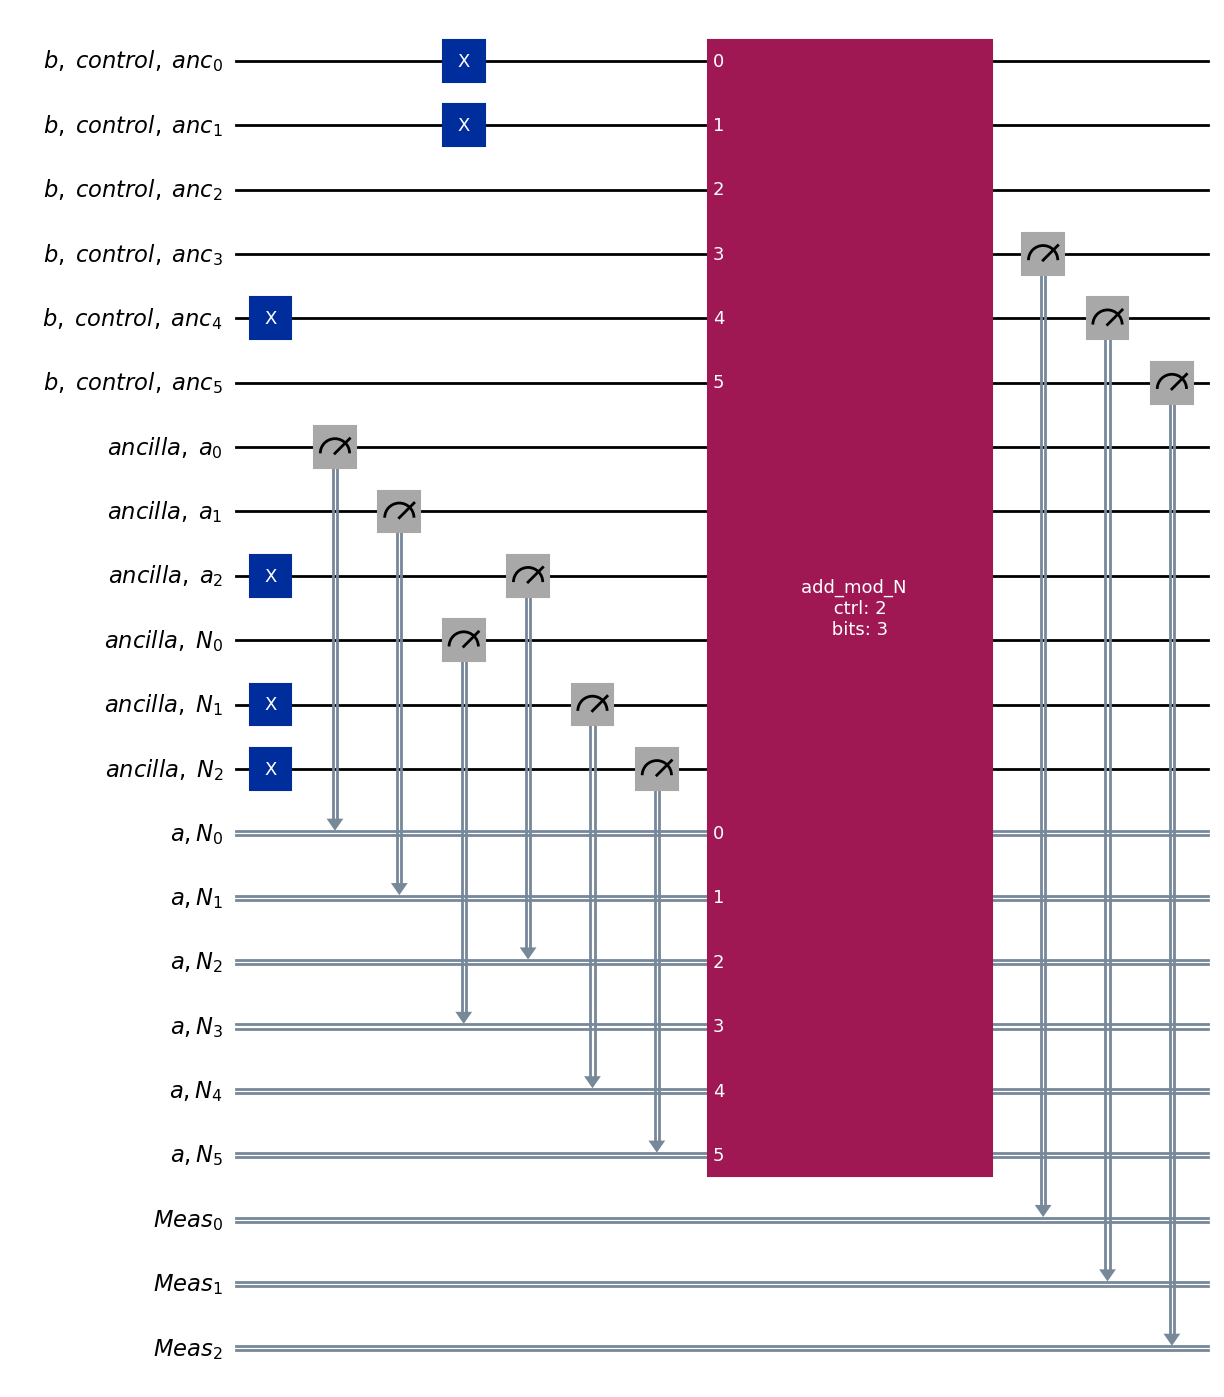

In [3]:
bit_size = 2
ctrl_bit_size = 2

cl_num_a = [0, 1]
q_num =    [1, 0]
cl_num_N = [1, 1]

cl_control_bits = [1, 1]

bit_size = bit_size + 1
cl_reg = qiskit.ClassicalRegister(bit_size * 2, 'a,N') #classical register to store nclassical number a
#cl_reg_N = qiskit.ClassicalRegister(bit_size, 'N') #classical register to store nclassical number N
cl_reg_meas = qiskit.ClassicalRegister(bit_size, 'Meas') #classical register to get measured data

q_reg = qiskit.QuantumRegister(bit_size + ctrl_bit_size + 1, 'b, control, anc') #quantum register to store classical number b
q_reg_cl_a = qiskit.QuantumRegister(bit_size, 'ancilla, a') #ancilla quantum register to store classical number a
q_reg_cl_N = qiskit.QuantumRegister(bit_size, 'ancilla, N') #ancilla quantum register to store classical number N
#q_reg_contr = qiskit.QuantumRegister(ctrl_bit_size, 'contr') #ancilla quantum register to store classical control bits
#q_anc = qiskit.QuantumRegister(1, 'ancilla') #ancilla quantum qubit

adder_mod_N = qiskit.QuantumCircuit(q_reg, q_reg_cl_a, q_reg_cl_N, cl_reg, cl_reg_meas)

#preparing quantum number b
q_reg_b = []
for i in range(bit_size):
    q_reg_b.append(q_reg[i + ctrl_bit_size+1])
adder_mod_N = qr.qubit_binary_prepare(q_reg_b, q_num, adder_mod_N)

#preparing classical number a 
adder_mod_N = qr.qubit_binary_prepare(q_reg_cl_a, cl_num_a, adder_mod_N)
cl_reg_a = []
for i in range(bit_size):
    cl_reg_a.append(cl_reg[i])
adder_mod_N = qr.qubits_meas(q_reg_cl_a, cl_reg_a, adder_mod_N)

#preparing classical number N
adder_mod_N = qr.qubit_binary_prepare(q_reg_cl_N, cl_num_N, adder_mod_N)
cl_reg_N = []
for i in range(bit_size):
    cl_reg_N.append(cl_reg[i + bit_size])
adder_mod_N = qr.qubits_meas(q_reg_cl_N, cl_reg_N, adder_mod_N)

#preparing control qubits
q_reg_contr = []
for i in range(ctrl_bit_size):
    q_reg_contr.append(q_reg[i])
adder_mod_N = qr.qubit_binary_prepare(q_reg_contr, cl_control_bits, adder_mod_N)

instr = qr.ctrl_add_mod_N(bit_size, ctrl_bit_size)
adder_mod_N.append(instr, q_reg, cl_reg)

adder_mod_N = qr.qubits_meas(q_reg_b, cl_reg_meas, adder_mod_N)

adder_mod_N.draw('mpl')

We perfromed addition mod[1, 1] of quantum number [1, 0] and classical number [0, 1].
The result is the lowest 2 third of bits in hystogram x-axis notation. The higher the bit is space the hisgher the bit digit.


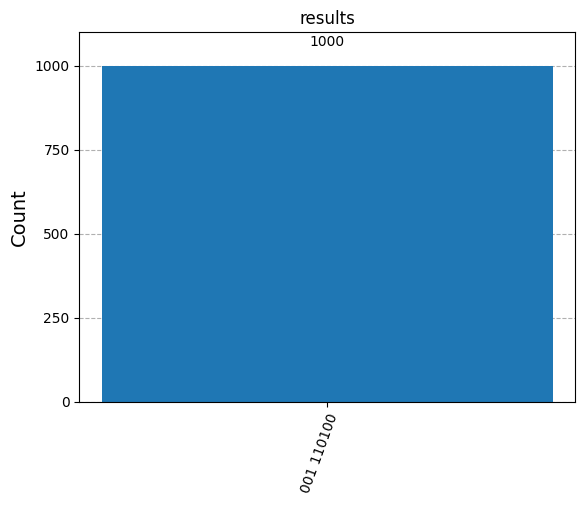

In [27]:
print('We perfromed addition mod' + str(cl_num_N) + ' of quantum number '+str(q_num) + ' and classical number ' + str(cl_num_a) + '.' )
print('The result is the lowest ' + str(bit_size-1) + ' third of bits in hystogram x-axis notation. The higher the bit is space the hisgher the bit digit.')
qr.plot_hyst_func(adder_mod_N,1000)

## The  modulo N subtractor (b - a)mod N but realized using a function from a quantum_routines library
The added adds two number with bit_size bits.
The adder 
1) The block (subtractor) has ctrl_bit_size + bit_size + 1 input qubits. The first ctrl_bit_size are control qunbits. The next bit_size qubits is the added number b. The last qubit is a ancilla cubit used in calculations.
2) The block has 2 * bit_size classical inputs. First bit_size is the added number a. The second bit_size bits are for the N number
3) For all numbers the higher the bit in the schemation the higher the bit digit. In other worrds the bit[0] is the highest bit.

qubit_binary_prepare: Size of quantum number is bigger than that of classical, so the classical number extended by adding few highest bits
qubit_binary_prepare: Size of quantum number is bigger than that of classical, so the classical number extended by adding few highest bits
qubit_binary_prepare: Size of quantum number is bigger than that of classical, so the classical number extended by adding few highest bits


C:\Users\Oleg\AppData\Local\Programs\Python\Python310\lib\site-packages\qiskit\circuit\quantumcircuit.py:3263: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


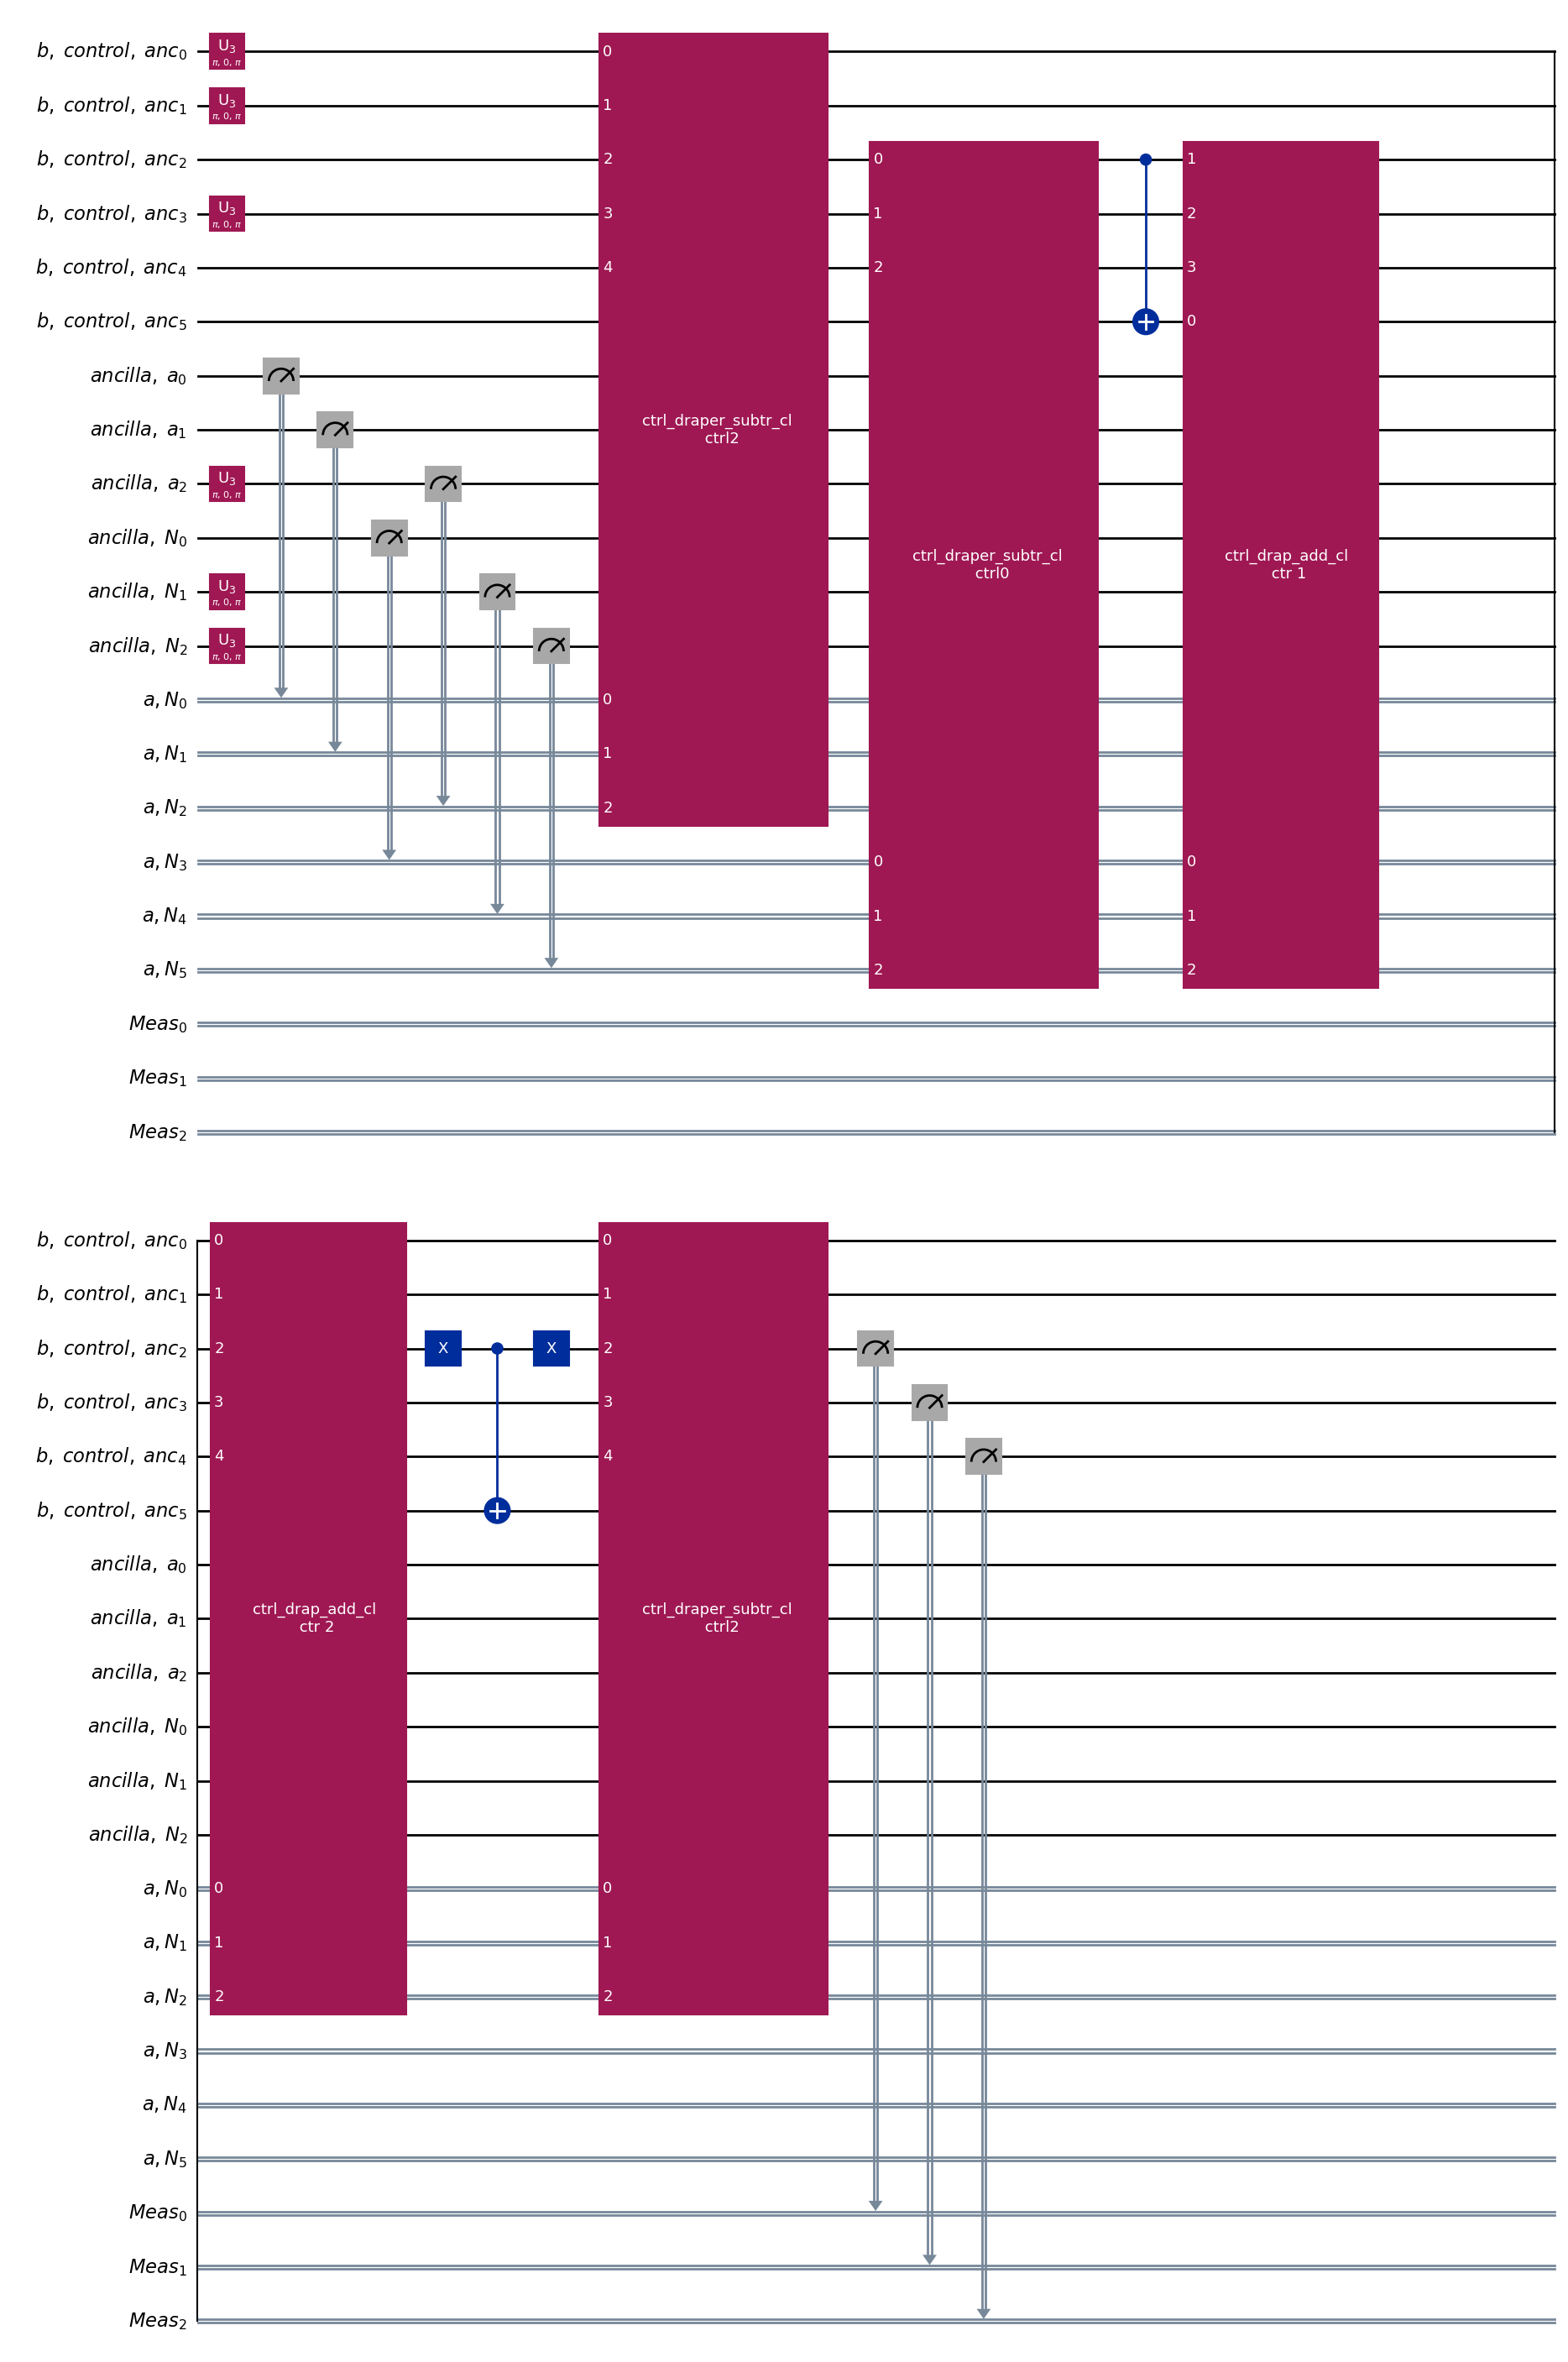

In [3]:
import qiskit
import numpy as np
import quantum_routines as qr

bit_size = 2
ctrl_bit_size = 2

cl_num_a = [0, 1]
q_num =    [1, 0]
cl_num_N = [1, 1]

cl_control_bits = [1, 1]

bit_size = bit_size + 1
cl_reg = qiskit.ClassicalRegister(bit_size * 2, 'a,N') #classical register to store nclassical number a
#cl_reg_N = qiskit.ClassicalRegister(bit_size, 'N') #classical register to store nclassical number N
cl_reg_meas = qiskit.ClassicalRegister(bit_size, 'Meas') #classical register to get measured data

q_reg = qiskit.QuantumRegister(bit_size + ctrl_bit_size + 1, 'b, control, anc') #quantum register to store classical number b
q_reg_cl_a = qiskit.QuantumRegister(bit_size, 'ancilla, a') #ancilla quantum register to store classical number a
q_reg_cl_N = qiskit.QuantumRegister(bit_size, 'ancilla, N') #ancilla quantum register to store classical number N
#q_reg_contr = qiskit.QuantumRegister(ctrl_bit_size, 'contr') #ancilla quantum register to store classical control bits
#q_anc = qiskit.QuantumRegister(1, 'ancilla') #ancilla quantum qubit

adder_mod_N = qiskit.QuantumCircuit(q_reg, q_reg_cl_a, q_reg_cl_N, cl_reg, cl_reg_meas)

#preparing quantum number b
q_reg_b = []
for i in range(bit_size):
    q_reg_b.append(q_reg[i + ctrl_bit_size])
adder_mod_N = qr.qubit_binary_prepare(q_reg_b, q_num, adder_mod_N)

#preparing classical number a 
adder_mod_N = qr.qubit_binary_prepare(q_reg_cl_a, cl_num_a, adder_mod_N)
cl_reg_a = []
for i in range(bit_size):
    cl_reg_a.append(cl_reg[i])
adder_mod_N = qr.qubits_meas(q_reg_cl_a, cl_reg_a, adder_mod_N)

#preparing classical number N
adder_mod_N = qr.qubit_binary_prepare(q_reg_cl_N, cl_num_N, adder_mod_N)
cl_reg_N = []
for i in range(bit_size):
    cl_reg_N.append(cl_reg[i + bit_size])
adder_mod_N = qr.qubits_meas(q_reg_cl_N, cl_reg_N, adder_mod_N)

#preparing control qubits
q_reg_contr = []
for i in range(ctrl_bit_size):
    q_reg_contr.append(q_reg[i])
adder_mod_N = qr.qubit_binary_prepare(q_reg_contr, cl_control_bits, adder_mod_N)

instr = qr.ctrl_subtr_mod_N(bit_size, ctrl_bit_size)
adder_mod_N.append(instr, q_reg, cl_reg)

adder_mod_N = qr.qubits_meas(q_reg_b, cl_reg_meas, adder_mod_N)

adder_mod_N.decompose().draw('mpl')

We perfromed subtraction mod[1, 1] of classical number [0, 1] from quantum number [1, 0].
The result is the lowest 2 bits in hystogram x-axis notation. The higher the bit is space the hisgher the bit digit.


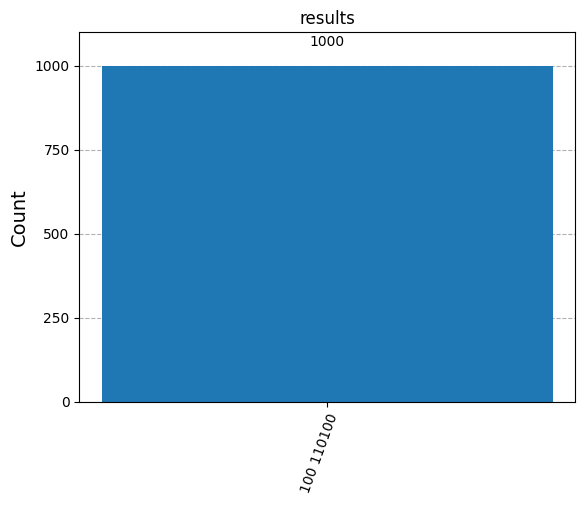

In [4]:
print('We perfromed subtraction mod' + str(cl_num_N) + ' of classical number ' + str(cl_num_a) + ' from quantum number '+str(q_num) + '.' )
print('The result is the lowest ' + str(bit_size-1) + ' bits in hystogram x-axis notation. The higher the bit is space the hisgher the bit digit.')
qr.plot_hyst_func(adder_mod_N,1000)